<a href="https://colab.research.google.com/github/Leehembling/bootcamp/blob/main/E_Commerce_project_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**E-Commerce Data Analysis**

Objective: Analyze the provided e-commerce dataset to gain insights into customer behavior, product performance, and sales trends. Utilize SQL queries to extract, transform, and analyze data within Google Colab.

---





# **Upload data** and prepare environment etc.

**1. Upload datasets** and perform other Python things

In [ ]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=filename, length=len(uploaded[filename])))

Saving new_york.csv to new_york (2).csv
Saving customers.csv to customers (2).csv
Saving products.csv to products (2).csv
Saving orders.csv to orders (2).csv
User uploaded file "new_york (2).csv" with length 1544469 bytes
User uploaded file "customers (2).csv" with length 4044 bytes
User uploaded file "products (2).csv" with length 1135 bytes
User uploaded file "orders (2).csv" with length 14740 bytes


In [ ]:
import sqlite3
import pandas as pd

In [ ]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

In [ ]:
# Adjust the path if you've stored your files in a specific folder in Colab
customers_df = pd.read_csv('customers.csv')
products_df = pd.read_csv('products.csv')
orders_df = pd.read_csv('orders.csv')
new_york_df = pd.read_csv('new_york.csv')

In [ ]:
# Extracts the data and brings into the SQLite database. Will now enable data extraction.
customers_df.to_sql('customers', conn, if_exists='replace', index=False)
products_df.to_sql('products', conn, if_exists='replace', index=False)
orders_df.to_sql('orders', conn, if_exists='replace', index=False)
new_york_df.to_sql('new_york', conn, if_exists='replace', index=False)

17614

In [ ]:
# Install Faker
!pip install Faker;

*Template for Python cradle* - remove #s

In [ ]:
## Describe function/concept - remove # from rows below

#query_name_of_function = """
#SQL;
#"""
#df_name_of_function = pd.read_sql_query(query_name_of_function, conn)
#df_name_of_function


*Example*

In [ ]:
# Selects a total amount of sales from orders, labelled as total_sales_revenue
query_total_sales_revenue = """

SELECT SUM(total_amount) AS total_sales_revenue FROM orders;

"""
df_total_sales_revenue = pd.read_sql_query(query_total_sales_revenue, conn)
df_total_sales_revenue

,total_sales_revenue
0,255476.44




---



**Project starts here**

---



# 2. Perform basic data exploration to understand the structure and relationships within the datasets.

Previews each of the orders, products and customer CSV datasets, using SELECT *

In [ ]:
query_data_exploration = """

SELECT * FROM orders;

"""
df_data_exploration = pd.read_sql_query(query_data_exploration, conn)
df_data_exploration

,order_id,customer_id,product_id,order_date,quantity,total_amount
0,1,7,34,2023-07-31,4,74.47
1,2,94,18,2024-02-27,2,184.81
2,3,38,9,2023-08-08,2,615.87
3,4,98,39,2023-07-04,2,818.07
4,5,32,36,2023-04-04,2,417.19
...,...,...,...,...,...,...
495,496,41,12,2023-12-08,3,780.48
496,497,17,42,2023-05-04,1,481.33
497,498,43,21,2024-01-21,2,394.38
498,499,31,8,2023-11-04,4,756.95


In [ ]:
query_data_exploration = """

SELECT * FROM products;

"""
df_data_exploration = pd.read_sql_query(query_data_exploration, conn)
df_data_exploration

,product_id,name,category,price
0,1,Involve,Baby,75.57
1,2,Magazine,Strategy,427.62
2,3,Sense,Tonight,331.57
3,4,That,Right,231.77
4,5,South,Ask,414.38
5,6,Deal,Represent,203.63
6,7,Wait,Read,358.78
7,8,Occur,Small,251.14
8,9,Good,Force,107.80
9,10,Certain,Police,54.59


In [ ]:
query_data_exploration = """

SELECT * FROM customers;

"""
df_data_exploration = pd.read_sql_query(query_data_exploration, conn)
df_data_exploration

,customer_id,name,email
0,1,Eric Walker,tcarroll@lee.org
1,2,Michael Herrera,hernandezkim@dean.info
2,3,Tina Lynch,johnwolf@hotmail.com
3,4,Angelica Salinas,andrea07@hotmail.com
4,5,Amanda Thomas,jeremykennedy@yahoo.com
...,...,...,...
95,96,Taylor Woodard,fharding@king-perez.com
96,97,Joshua Estrada,obryant@gmail.com
97,98,Michelle Wilson,douglasstephens@yahoo.com
98,99,Alexandra Martin,davidmcbride@gmail.com


# 3. Customer Analysis

3a. Top 10 customers by order count and total spending

In [ ]:
# Top 10 customers by orders
query_top_10_customers_order = """

SELECT customers.name, COUNT(orders.order_id) AS number_of_orders
FROM orders
JOIN customers ON orders.customer_id = customers.customer_id
GROUP BY customers.name
ORDER BY number_of_orders DESC
LIMIT 10

"""
df_top_10_customers_order = pd.read_sql_query(query_top_10_customers_order, conn)
df_top_10_customers_order

,name,number_of_orders
0,Katelyn Cox,12
1,Kim Smith,10
2,William Murphy,9
3,William Henry,9
4,Veronica Ortiz,9
5,Jessica Wallace,9
6,Thomas Martinez,8
7,Robin Miller,8
8,Paul Evans,8
9,James Fields,8


In [ ]:
# Top 10 customers by total spend
query_top_10_customers_total_spend = """

SELECT customers.name, COUNT(order_id) AS Total_Orders, SUM(orders.total_amount) AS Total_Spend
FROM orders
JOIN customers ON orders.customer_id = customers.customer_id
GROUP BY customers.name
ORDER BY Total_Spend DESC
LIMIT 10

"""
df_top_10_customers_total_spend = pd.read_sql_query(query_top_10_customers_total_spend, conn)
df_top_10_customers_total_spend

,name,Total_Orders,Total_Spend
0,Veronica Ortiz,9,5311.59
1,Katelyn Cox,12,5290.32
2,Paul Evans,8,5042.06
3,Alan Frost,7,4803.23
4,William Murphy,9,4769.30
5,Thomas Martinez,8,4568.67
6,Kim Smith,10,4511.88
7,James Myers,7,4237.22
8,Travis Fernandez,6,4233.53
9,James Miller,7,4046.81


3b. Determine customer segments based on their spending patterns.

In [ ]:
query_customer_segments = """

SELECT customers.name, orders.order_id
FROM orders
JOIN customers ON orders.customer_id = customers.customer_id;


"""
df_customer_segments = pd.read_sql_query(query_customer_segments, conn)
df_customer_segments

In [ ]:
# Customer segments
query_customer_segments = """

SELECT customers.name,orders.customer_id AS Customer_order_ID, total_amount,
  CASE
    WHEN total_amount > (SELECT AVG(total_amount) FROM Orders) THEN 'High'
    WHEN total_amount BETWEEN (SELECT AVG(total_amount) * 0.5 FROM Orders) AND (SELECT AVG(total_amount) FROM orders) THEN 'Medium'
    ELSE 'Low'
  END AS clv_segment

FROM orders JOIN customers ON Customer_order_ID=orders.customer_id
ORDER BY clv_segment,total_amount DESC

"""
df_customer_segments = pd.read_sql_query(query_customer_segments, conn)
df_customer_segments


,name,Customer_order_ID,total_amount,clv_segment
0,Eric Walker,70,997.84,High
1,Michael Herrera,70,997.84,High
2,Tina Lynch,70,997.84,High
3,Angelica Salinas,70,997.84,High
4,Amanda Thomas,70,997.84,High
...,...,...,...,...
49995,Taylor Woodard,15,256.42,Medium
49996,Joshua Estrada,15,256.42,Medium
49997,Michelle Wilson,15,256.42,Medium
49998,Alexandra Martin,15,256.42,Medium


# Product Insights

4a. Analyze product categories to find the most popular and profitable ones.


In [ ]:
# Most popular product categories
query_popular_products = """

SELECT category AS 'Product Category', COUNT(*) AS Total_orders, SUM(orders.total_amount) AS 'Total spend'
FROM orders JOIN products ON orders.product_id = products.product_id
GROUP BY category
ORDER BY Total_orders DESC;

"""
df_popular_products = pd.read_sql_query(query_popular_products, conn)
df_popular_products


,Product Category,Total_orders,Total spend
0,Small,24,9886.74
1,Very,16,9195.70
2,Strategy,16,8592.99
3,Middle,15,6743.01
4,Job,15,9082.56
5,Put,14,8035.32
6,Line,14,6413.00
7,Ask,14,4669.71
8,Sing,13,6182.25
9,Citizen,13,6529.77


4b. Identify the top 3 products by quantity sold and by total sales revenue.

In [ ]:
# 3 most popular products
query_popular_products = """

SELECT category AS 'Product Category', COUNT(*) AS Total_orders, SUM(orders.total_amount) AS 'Total spend'
FROM orders JOIN products ON orders.product_id = products.product_id
GROUP BY category
ORDER BY Total_orders DESC
LIMIT 3;

"""
df_popular_products = pd.read_sql_query(query_popular_products, conn)
df_popular_products

,Product Category,Total_orders,Total spend
0,Small,24,9886.74
1,Very,16,9195.70
2,Strategy,16,8592.99


In [ ]:
# 3 most 'profitable' products
query_profitable_products = """

SELECT category AS 'Product Category', COUNT(*) AS 'Total orders', SUM(orders.total_amount) AS Total_spend
FROM orders JOIN products ON orders.product_id = products.product_id
GROUP BY category
ORDER BY Total_spend DESC
LIMIT 3;

"""
df_profitable_products = pd.read_sql_query(query_profitable_products, conn)
df_profitable_products

,Product Category,Total orders,Total_spend
0,Small,24,9886.74
1,Very,16,9195.70
2,Job,15,9082.56


Additional - 3 least profitable products

In [ ]:
# 3 least 'profitable' products
query_profitable_products = """

SELECT category AS 'Product Category', COUNT(*) AS 'Total orders', SUM(orders.total_amount) AS Total_spend
FROM orders JOIN products ON orders.product_id = products.product_id
GROUP BY category
ORDER BY Total_spend
LIMIT 3;

"""
df_profitable_products = pd.read_sql_query(query_profitable_products, conn)
df_profitable_products

,Product Category,Total orders,Total_spend
0,Read,4,1988.81
1,Population,5,2213.48
2,Expect,6,2820.42


# Sales Trends

5a.Examine monthly sales trends to identify peak sales periods.


Month by month for 2023 (No data prior to March 2023)

In [ ]:
# Selects year and month (% begins with) order dates, calls it month. Collects total amount of monthly sales, calls it monthly_sales, both from orders file
# Between today's date and the last months
# Grouped and sorted by month from oldest to most recent
query_sales_trend_last_year = """
SELECT strftime('%Y-%m', order_date) AS month, SUM(total_amount) AS monthly_sales
FROM orders
WHERE order_date BETWEEN '2023-01-01' AND '2023-12-31'
GROUP BY month
ORDER BY month;
"""
df_sales_trend_last_year = pd.read_sql_query(query_sales_trend_last_year, conn)
df_sales_trend_last_year

,month,monthly_sales
0,2023-03,19004.68
1,2023-04,19938.16
2,2023-05,23342.28
3,2023-06,15130.83
4,2023-07,19019.46
5,2023-08,23585.38
6,2023-09,24655.64
7,2023-10,23684.80
8,2023-11,30002.85
9,2023-12,17596.42


from matplotlib import pyplot as plt
df_sales_trend_last_year['monthly_sales'].plot(kind='hist', bins=20, title='monthly_sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_sales_trend_last_year['monthly_sales'].plot(kind='line', figsize=(8, 4), title='monthly_sales')
plt.gca().spines[['top', 'right']].set_visible(False)

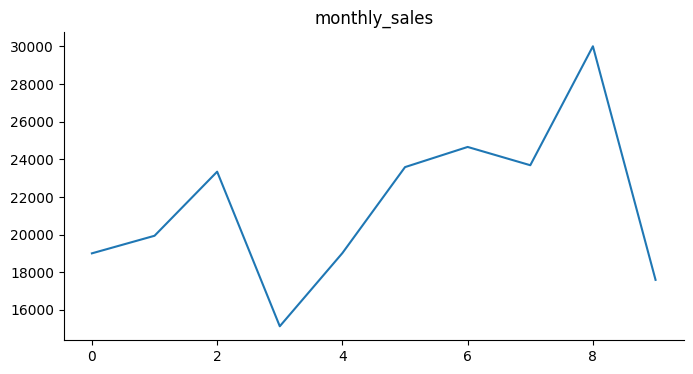

In [ ]:
from matplotlib import pyplot as plt
df_sales_trend_last_year['monthly_sales'].plot(kind='line', figsize=(8, 4), title='monthly_sales')
plt.gca().spines[['top', 'right']].set_visible(False)

Last 12 months

In [ ]:
# Selects year and month (% begins with) order dates, calls it month. Collects total amount of monthly sales, calls it monthly_sales, both from orders file
# Between today's date and the last months
# Grouped by month and ordered by monthly sales, in descending order
query_sales_trend_last_year = """
SELECT strftime('%Y-%m', order_date) AS month, SUM(total_amount) AS monthly_sales
FROM orders
WHERE order_date >= date('now', '-12 month')
GROUP BY month
ORDER BY monthly_sales DESC;
"""
df_sales_trend_last_year = pd.read_sql_query(query_sales_trend_last_year, conn)
df_sales_trend_last_year

,month,monthly_sales
0,2023-11,30002.85
1,2023-09,24655.64
2,2023-10,23684.80
3,2023-08,23585.38
4,2023-05,23342.28
5,2023-04,19938.16
6,2023-07,19019.46
7,2024-01,18383.16
8,2023-12,17596.42
9,2024-02,17096.57


5b. Compare the sales performance of different product categories over time.

In [ ]:
# Displays sales totals for each category for each month over last 12 months
query_sales_trend_last_year = """
SELECT strftime('%Y-%m', order_date) AS month,products.category,SUM(total_amount) AS category_sales
FROM orders JOIN products ON orders.product_id = products.product_id
WHERE order_date >= date('now', '-12 month')
GROUP BY month, category
ORDER BY month, category_sales DESC;
"""
df_sales_trend_last_year = pd.read_sql_query(query_sales_trend_last_year, conn)
df_sales_trend_last_year

,month,category,category_sales
0,2023-03,Worker,1782.19
1,2023-03,Very,1525.46
2,2023-03,Strategy,1275.04
3,2023-03,Population,1069.99
4,2023-03,Fund,917.44
...,...,...,...
320,2024-03,Recognize,969.41
321,2024-03,Middle,837.64
322,2024-03,Sing,666.76
323,2024-03,Year,448.97


# Advanced analysis

6a. Calculate the growth rate in customer acquisition by month.

In [ ]:
# Growth rate in customer acquisition by month
query_customer_aquisition = """
WITH monthly_new_customers AS (
  SELECT strftime('%Y-%M',MIN(order_date)) AS first_order_month, COUNT(DISTINCT customer_id) AS new_customers
  FROM orders
  GROUP BY customer_id
)

SELECT first_order_month, new_customers,
  (new_customers - LAG(new_customers) OVER (ORDER BY first_order_month)) * 100.0 / LAG(new_customers) OVER (ORDER BY first_order_month) AS growth_rate
FROM monthly_new_customers
ORDER BY first_order_month;

"""
df_customer_aquisition = pd.read_sql_query(query_customer_aquisition, conn)
df_customer_aquisition

,first_order_month,new_customers,growth_rate
0,2023-00,1,NaN
1,2023-00,1,0.0
2,2023-00,1,0.0
3,2023-00,1,0.0
4,2023-00,1,0.0
...,...,...,...
94,2023-00,1,0.0
95,2023-00,1,0.0
96,2023-00,1,0.0
97,2023-00,1,0.0


6b. Determine the percentage of total sales contributed by each customer segment

In [ ]:
# Determine the percentage of total sales contributed by each customer segment
query_customer_aquisition = """
WITH segment_sales AS (
  SELECT customers.segment, SUM(orders.total_amount) AS total_sales
  FROM orders JOIN customers ON orders.customer_id = customers.customer_id
  GROUP BY segment
), total_sales AS (
  SELECT SUM(total_amount) AS total FROM orders
)
SELECT segment, total_sales, (total_sales * 100.0 / (SELECT total FROM total_sales)) AS percentage_of_total_sales
FROM segment_sales;


"""
df_customer_aquisition = pd.read_sql_query(query_customer_aquisition, conn)
df_customer_aquisition

DatabaseError: Execution failed on sql '
WITH segment_sales AS (
  SELECT customers.segment, SUM(orders.total_amount) AS total_sales
  FROM orders JOIN customers ON orders.customer_id = customers.customer_id
  GROUP BY segment
), total_sales AS (
  SELECT SUM(total_amount) AS total FROM orders
)
SELECT segment, total_sales, (total_sales * 100.0 / (SELECT total FROM total_sales)) AS percentage_of_total_sales
FROM segment_sales;


': no such column: customers.segment